In [2]:
!pip install jovian --upgrade --quiet

In [28]:
import os
import torch
import torchvision
import tarfile
import matplotlib
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
project_name = 'practice-cifar10-cnn'

In [6]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

In [7]:
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path = './data')

In [9]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'ship', 'cat', 'deer', 'frog', 'horse', 'automobile', 'truck', 'dog', 'bird']


In [18]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No of training examples for airplanes:',len(airplane_files))
print(airplane_files[:5])

No of training examples for airplanes: 5000
['0374.png', '4944.png', '1457.png', '3959.png', '3851.png']


In [20]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship :",len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship : 1000
['0374.png', '0244.png', '0004.png', '0263.png', '0896.png']


In [22]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [23]:
dataset = ImageFolder(data_dir+'/train', transform = ToTensor())

In [25]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [26]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [29]:
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [30]:
def show_example(img, label):
  print('Label',dataset.classes[label], "(" + str(label) + ")")
  plt.imshow(img.permute(1, 2, 0))

Label airplane (0)


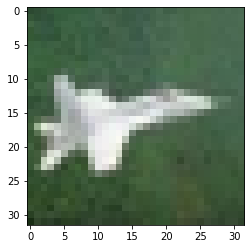

In [32]:
img ,label = dataset[4]
show_example(img, label)

Label airplane (0)


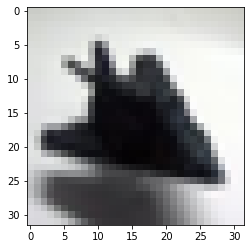

In [33]:
show_example(*dataset[0])

Label airplane (0)


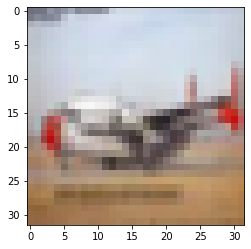

In [34]:
show_example(*dataset[1099])

In [35]:
!pip install jovian --upgrade -q

In [36]:
import jovian

In [38]:
jovian.commit(project='practice-cifar10-cnn')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/raghavsodhi02/practice-cifar10-cnn


'https://jovian.ai/raghavsodhi02/practice-cifar10-cnn'

In [39]:
random_seed = 42
torch.manual_seed(random_seed)


In [42]:
val_size = 5000
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [43]:
jovian.log_dataset(dataset_url=dataset_url, 
                   val_size=val_size, 
                   random_seed=random_seed)

[jovian] Dataset logged.


In [44]:
from torch.utils.data.dataloader import DataLoader
batch_size = 128


In [45]:
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True) 
val_dl = DataLoader(val_ds, batch_size*2, num_workers = 4, pin_memory = True)

In [50]:
from torchvision.utils import make_grid
def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize = (12, 6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1,2,0))
    break

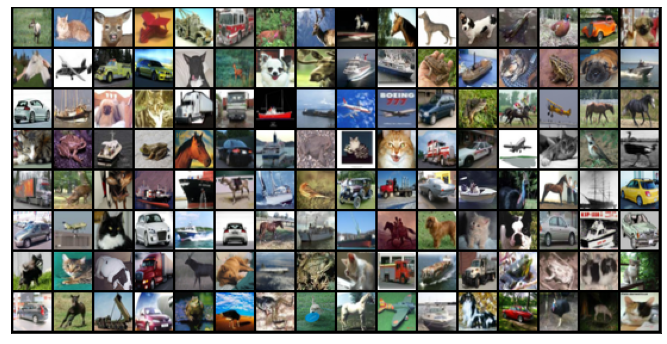

In [51]:
show_batch(train_dl)